### Load Modules

In [34]:
import numpy as np
import os
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

### Prepare/collect data

In [35]:
import os
import cv2
import numpy as np

# Path to the training data
path = 'C:\\Desktop\\brain_tumor\\Dataset'
classes = {'no_tumor': 0, 'pituitary_tumor': 1, 'meningioma_tumor': 2, 'glioma_tumor': 3}

X = []  # List to store image data
Y = []  # List to store labels

# Load the data
for cls in classes:
    class_path = os.path.join(path, cls)
    if not os.path.exists(class_path):
        print(f"Error: Directory '{class_path}' does not exist.")
        continue

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path, 0)  # Read image in grayscale
        
        if img is None:
            print(f"Warning: Unable to read image '{img_path}'. Skipping...")
            continue
        
        # Resize and append image
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

# Convert to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Print summary
print(f"Total images loaded: {len(X)}")
print(f"Labels distribution: {np.unique(Y, return_counts=True)}")


Total images loaded: 3160
Labels distribution: (array([0, 1, 2, 3]), array([396, 901, 937, 926], dtype=int64))


In [36]:

# Reshape data and normalize
X = X.reshape(-1, 200, 200, 1)  # Add channel dimension
X = X.astype('float32') / 255.0  # Normalize pixel values to [0, 1]

# One-hot encode labels
Y = to_categorical(Y, num_classes=len(classes))

In [37]:
# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
xtrain.shape

(2528, 200, 200, 1)

In [39]:
xtest.shape

(632, 200, 200, 1)

In [40]:
ytrain.shape

(2528, 4)

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data Augmentation (for better generalization)
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(xtrain)


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Flatten the images
X_train_flat = xtrain.reshape(xtrain.shape[0], -1)
X_test_flat = xtest.reshape(xtest.shape[0], -1)

# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=50,
    max_depth=10,
    min_samples_split=15,
    random_state=42)
rf.fit(X_train_flat, np.argmax(ytrain, axis=1))


# Convert y_test to single-class labels if it's in one-hot encoding
y_true = np.argmax(ytest, axis=1)  # Convert from one-hot encoding to single-class labels
# Predictions and evaluation
y_pred = rf.predict(X_test_flat)


# Evaluate the model
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")


Accuracy: 88.13%
Precision: 88.48%
Recall: 88.13%
F1 Score: 88.07%


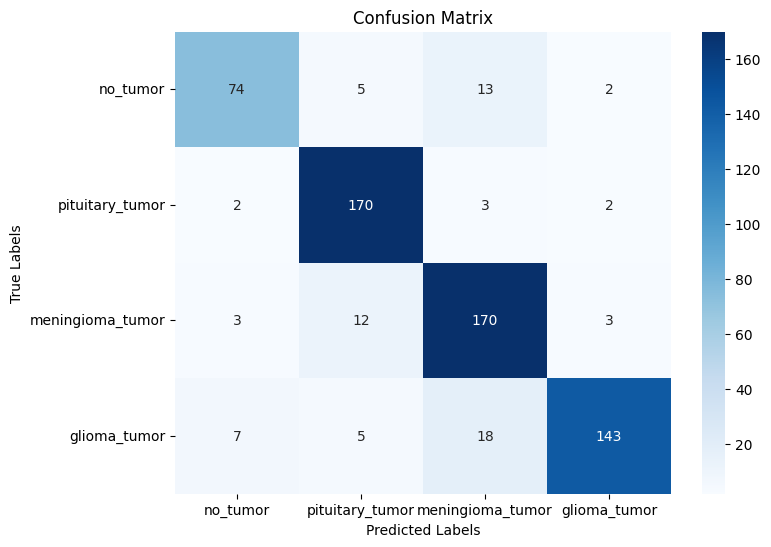

In [43]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert ytest from one-hot encoded format to class labels
ytest_labels = np.argmax(ytest, axis=1)  # Convert one-hot encoded ytest to class labels

# Generate confusion matrix (y_pred is already in class label format)
cm = confusion_matrix(ytest_labels, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes.keys(), yticklabels=classes.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [44]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Example Random Forest training
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_flat, np.argmax(ytrain, axis=1))

# Save model to .pkl
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)
